In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('META.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2946,2024-02-05,469.880005,471.899994,459.220001,459.410004,459.410004,40832400
2947,2024-02-06,464.000000,467.119995,453.000000,454.720001,454.720001,21655200
2948,2024-02-07,458.000000,471.519989,456.179993,469.589996,469.589996,23066000
2949,2024-02-08,468.320007,470.589996,465.029999,470.000000,470.000000,18815100


In [6]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999
...,...,...
2946,2024-02-05,459.410004
2947,2024-02-06,454.720001
2948,2024-02-07,469.589996
2949,2024-02-08,470.000000


In [7]:
# Device agnostiv code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

C:\Users\Kumud Jain\AppData\Local\Temp\ipykernel_5060\469103719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


0      2012-05-18
1      2012-05-21
2      2012-05-22
3      2012-05-23
4      2012-05-24
          ...    
2946   2024-02-05
2947   2024-02-06
2948   2024-02-07
2949   2024-02-08
2950   2024-02-09
Name: Date, Length: 2951, dtype: datetime64[ns]

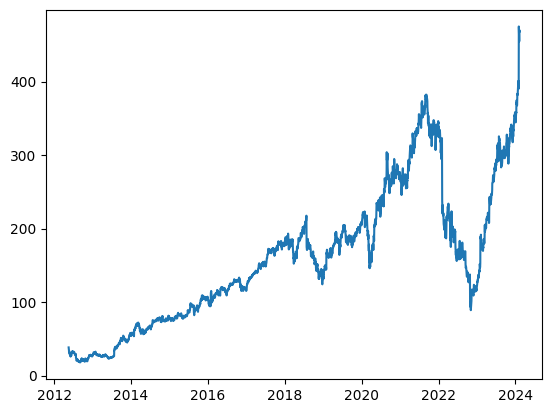

In [9]:
plt.plot(data['Date'], data['Close'])

In [10]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2012-05-30,28.190001,28.840000,31.910000,33.029999,32.000000,31.000000,34.029999,38.230000
2012-05-31,29.600000,28.190001,28.840000,31.910000,33.029999,32.000000,31.000000,34.029999
2012-06-01,27.719999,29.600000,28.190001,28.840000,31.910000,33.029999,32.000000,31.000000
2012-06-04,26.900000,27.719999,29.600000,28.190001,28.840000,31.910000,33.029999,32.000000
2012-06-05,25.870001,26.900000,27.719999,29.600000,28.190001,28.840000,31.910000,33.029999
...,...,...,...,...,...,...,...,...
2024-02-05,459.410004,474.989990,394.779999,390.140015,400.059998,401.019989,394.140015,393.179993
2024-02-06,454.720001,459.410004,474.989990,394.779999,390.140015,400.059998,401.019989,394.140015
2024-02-07,469.589996,454.720001,459.410004,474.989990,394.779999,390.140015,400.059998,401.019989


In [11]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[ 28.190001,  28.84    ,  31.91    , ...,  31.      ,  34.029999,
         38.23    ],
       [ 29.6     ,  28.190001,  28.84    , ...,  32.      ,  31.      ,
         34.029999],
       [ 27.719999,  29.6     ,  28.190001, ...,  33.029999,  32.      ,
         31.      ],
       ...,
       [469.589996, 454.720001, 459.410004, ..., 390.140015, 400.059998,
        401.019989],
       [470.      , 469.589996, 454.720001, ..., 394.779999, 390.140015,
        400.059998],
       [468.109985, 470.      , 469.589996, ..., 474.98999 , 394.779999,
        390.140015]])

In [12]:
shifted_df_as_np.shape

(2944, 8)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.95424922, -0.9514062 , -0.93797839, ..., -0.94195862,
        -0.91494691, -0.89303138],
       [-0.94808205, -0.95424922, -0.9514062 , ..., -0.93758474,
        -0.93075739, -0.91494691],
       [-0.95630495, -0.94808205, -0.95424922, ..., -0.93307965,
        -0.92553941, -0.93075739],
       ...,
       [ 0.97638108,  0.91134151,  0.93185502, ...,  0.62887645,
         0.99499078,  1.        ],
       [ 0.97817439,  0.97638108,  0.91134151, ...,  0.64917118,
         0.9432285 ,  0.99499078],
       [ 0.96990769,  0.97817439,  0.97638108, ...,  1.        ,
         0.96743985,  0.9432285 ]])

In [14]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2944, 7), (2944,))

In [15]:
X = dc(np.flip(X, axis=1))
X

array([[-0.89303138, -0.91494691, -0.94195862, ..., -0.93307965,
        -0.93797839, -0.9514062 ],
       [-0.91494691, -0.93075739, -0.93758474, ..., -0.93797839,
        -0.9514062 , -0.95424922],
       [-0.93075739, -0.92553941, -0.93307965, ..., -0.9514062 ,
        -0.95424922, -0.94808205],
       ...,
       [ 1.        ,  0.99499078,  0.62887645, ...,  1.        ,
         0.93185502,  0.91134151],
       [ 0.99499078,  0.9432285 ,  0.64917118, ...,  0.93185502,
         0.91134151,  0.97638108],
       [ 0.9432285 ,  0.96743985,  1.        , ...,  0.91134151,
         0.97638108,  0.97817439]])

In [16]:
split_index = int(len(X) * 0.95)

split_index

2796

In [17]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2796, 7), (148, 7), (2796,), (148,))

In [18]:
# LSTM require extra dimension
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2796, 7, 1), (148, 7, 1), (2796, 1), (148, 1))

In [19]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([2796, 7, 1]),
 torch.Size([148, 7, 1]),
 torch.Size([2796, 1]),
 torch.Size([148, 1]))

In [20]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [21]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [23]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [24]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    return running_loss

In [25]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()
    return running_loss / len(train_loader), model, loss_function

In [26]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


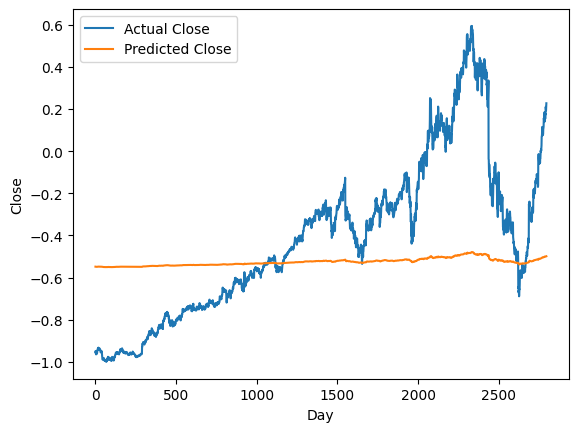

In [27]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [28]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([121.04946311, 121.00198522, 120.99905533, ..., 132.24513645,
       132.25029443, 132.32857708])

In [29]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 28.19000444,  29.60000526,  27.71999508, ..., 290.53000001,
       294.10000659, 298.29000919])

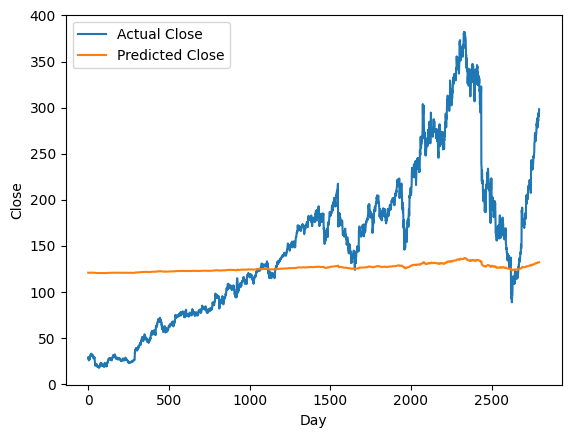

In [30]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [31]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([132.46055854, 132.75829019, 133.01736087, 133.07900446,
       133.16058495, 133.24112294, 133.37135328, 133.1724953 ,
       132.88202707, 132.65143086, 132.57320271, 132.60431409,
       132.87932884, 133.30882391, 133.44145268, 133.6241281 ,
       133.56719278, 133.51823631, 133.43786185, 133.4962553 ,
       133.43625382, 133.25483211, 133.15477967, 133.0140903 ,
       133.02559183, 132.94312556, 132.73379492, 132.42693291,
       132.21382066, 132.21794977, 132.17009712, 132.27091951,
       132.17674048, 132.10698177, 132.16799169, 132.35670405,
       132.40606935, 132.4565589 , 132.4903685 , 132.59422299,
       132.63912531, 132.65414952, 132.64176221, 132.8318782 ,
       132.8229795 , 132.8925338 , 133.06269245, 132.9331503 ,
       132.91242982, 132.94625305, 132.84875575, 132.72030378,
       132.70585192, 132.7233427 , 132.70542947, 132.6683561 ,
       132.76814281, 132.75389535, 132.88666039, 132.84064063,
       132.91044703, 132.93595073, 133.16840708, 133.35

In [32]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([309.3399953 , 313.41000516, 308.86999276, 310.61999745,
       312.04998968, 316.01001271, 302.51998781, 294.26000941,
       291.60998586, 294.47000098, 298.57000817, 311.70999262,
       325.4800131 , 318.60000412, 322.70998998, 314.31000017,
       313.19000426, 310.73001153, 316.56000134, 312.64001563,
       305.20999077, 305.73998799, 301.64001486, 306.18999912,
       301.95001118, 294.29001015, 285.089996  , 283.24999931,
       289.89999465, 287.60000474, 294.23999074, 286.74999847,
       285.50000047, 290.26001037, 297.98999155, 295.10000635,
       295.89001454, 296.38000509, 300.14999389, 299.1700128 ,
       298.67001292, 297.89001406, 307.55999668, 301.66000287,
       305.06000069, 311.72000195, 300.30999672, 302.54998855,
       305.07001002, 299.67001268, 295.73001171, 299.07998672,
       300.82998801, 298.95999057, 297.73998991, 303.95998937,
       300.20999197, 306.8200079 , 300.94000208, 305.57998857,
       304.79000763, 315.42999609, 318.35998455, 321.83

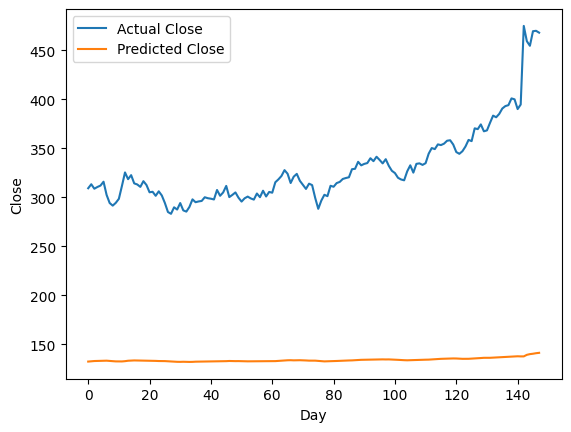

In [33]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [34]:
#Data
#Time
#Space
#Integration with Flask
#Report in Spread Sheet

In [35]:
Months = [24, 60, 84]

In [36]:
for months in Months:
    print("#"*20)
    print("For :", months)
    days = 30 * months
    tmp_df = dc(shifted_df[:days])

    tmp_df_as_np = tmp_df.to_numpy()

    tmp_df_as_np = scaler.fit_transform(tmp_df_as_np)

    X_tmp = tmp_df_as_np[:, 1:]
    y_tmp = tmp_df_as_np[:, 0]

    X_tmp = dc(np.flip(X_tmp, axis=1))

    split_index = int(len(X) * 0.80)

    X_train_tmp = X_tmp[:split_index]
    X_test_tmp = X_tmp[split_index:]

    y_train_tmp = y[:split_index]
    y_test_tmp = y[split_index:]
    # LSTM require extra dimension
    X_train_tmp = X_train_tmp.reshape((-1, lookback, 1))
    X_test_tmp = X_test_tmp.reshape((-1, lookback, 1))

    y_train_tmp = y_train_tmp.reshape((-1, 1))
    y_test_tmp = y_test_tmp.reshape((-1, 1))

    X_train_tmp = torch.tensor(X_train_tmp).float()
    y_train_tmp = torch.tensor(y_train_tmp).float()
    X_test_tmp = torch.tensor(X_test_tmp).float()
    y_test_tmp = torch.tensor(y_test_tmp).float()

    train_dataset = TimeSeriesDataset(X_train_tmp, y_train_tmp)
    test_dataset = TimeSeriesDataset(X_test_tmp, y_test_tmp)
    
    batch_size = 16

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for _, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        break

    learning_rate = 0.001
    num_epochs = 10
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        train_one_epoch()
        validate_one_epoch()





####################
For : 24
Epoch: 1


ZeroDivisionError: float division by zero

In [ ]:
for months in Months:
    print("#"*20)
    print("For :", months)
    days = 30 * months
    tmp_df = dc(shifted_df[:days])

    tmp_df_as_np = tmp_df.to_numpy()

    tmp_df_as_np = scaler.fit_transform(tmp_df_as_np)

    X_tmp = tmp_df_as_np[:, 1:]
    y_tmp = tmp_df_as_np[:, 0]

    X_tmp = dc(np.flip(X_tmp, axis=1))

    split_index = int(len(X) * 0.80)

    X_train_tmp = X_tmp[:split_index]
    X_test_tmp = X_tmp[split_index:]

    y_train_tmp = y[:split_index]
    y_test_tmp = y[split_index:]
    # LSTM require extra dimension
    X_train_tmp = X_train_tmp.reshape((-1, lookback, 1))
    X_test_tmp = X_test_tmp.reshape((-1, lookback, 1))

    y_train_tmp = y_train_tmp.reshape((-1, 1))
    y_test_tmp = y_test_tmp.reshape((-1, 1))

    X_train_tmp = torch.tensor(X_train_tmp).float()
    y_train_tmp = torch.tensor(y_train_tmp).float()
    X_test_tmp = torch.tensor(X_test_tmp).float()
    y_test_tmp = torch.tensor(y_test_tmp).float()

    train_dataset = TimeSeriesDataset(X_train_tmp, y_train_tmp)
    test_dataset = TimeSeriesDataset(X_test_tmp, y_test_tmp)
    
    batch_size = 16

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for _, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        break

    learning_rate = 0.001
    num_epochs = 10
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        train_one_epoch()
        validate_one_epoch()